In [3]:
# Step 1 : import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Step 2: load Dataset
df = pd.read_csv("heart.csv") # Once make sure that data set is same folder
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [11]:
# step 3 : Checking Dataset Shape & Info
print("Shape:", df.shape)
df.info()
# step 4 : Checking for Missing Values
df.isnull().sum()


Shape: (1025, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
# Step 5 : Rename target Column (Optional, for clarity)
df.rename(columns={"target": "HeartDisease"}, inplace=True)


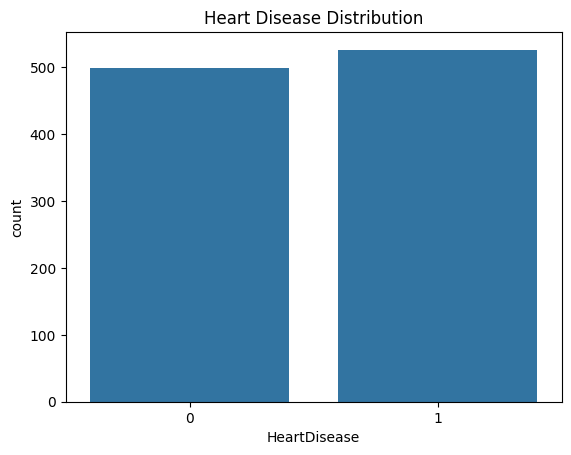

In [15]:

# Step 6 : Basic Visualizetion
sns.countplot(x='HeartDisease', data=df)
plt.title("Heart Disease Distribution")
plt.show()


In [17]:
# STEP 7 : SPLIT DATA 
X = df.drop("HeartDisease",axis =1)
y = df["HeartDisease"]


In [20]:
# STEP 8 : TRAIN-TEST SPLIT
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test =train_test_split( X,y,test_size=0.2,random_state=42)

In [24]:
# STEP 9 : Train Logistic Regression Model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter =1000)
model.fit(X_train,y_train)


LogisticRegression(max_iter=1000)

In [27]:
# STEP 10 : Prediction & Accuracy
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
y_pred = model.predict(X_test)
print("Accuracy :" ,accuracy_score(y_test, y_pred))
print("\nClassification Report :\n", classification_report(y_test,y_pred))



Accuracy : 0.7951219512195122

Classification Report :
               precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



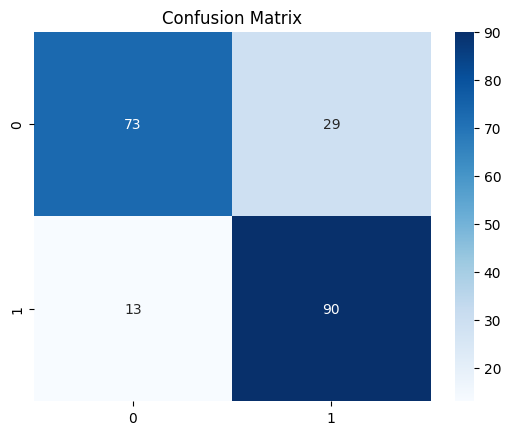

In [28]:
# STEP 11 : Finally Confusion matrix & FINALLY  PRIDICATION
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d",cmap="Blues")
plt.title("Confusion Matrix")
plt.show()